社交网络关系：
Yanyan-Wang:{'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}
Aarebecca:{'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}
pomelo-nwu:{'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 1}
tyn1998:{'andyhuang

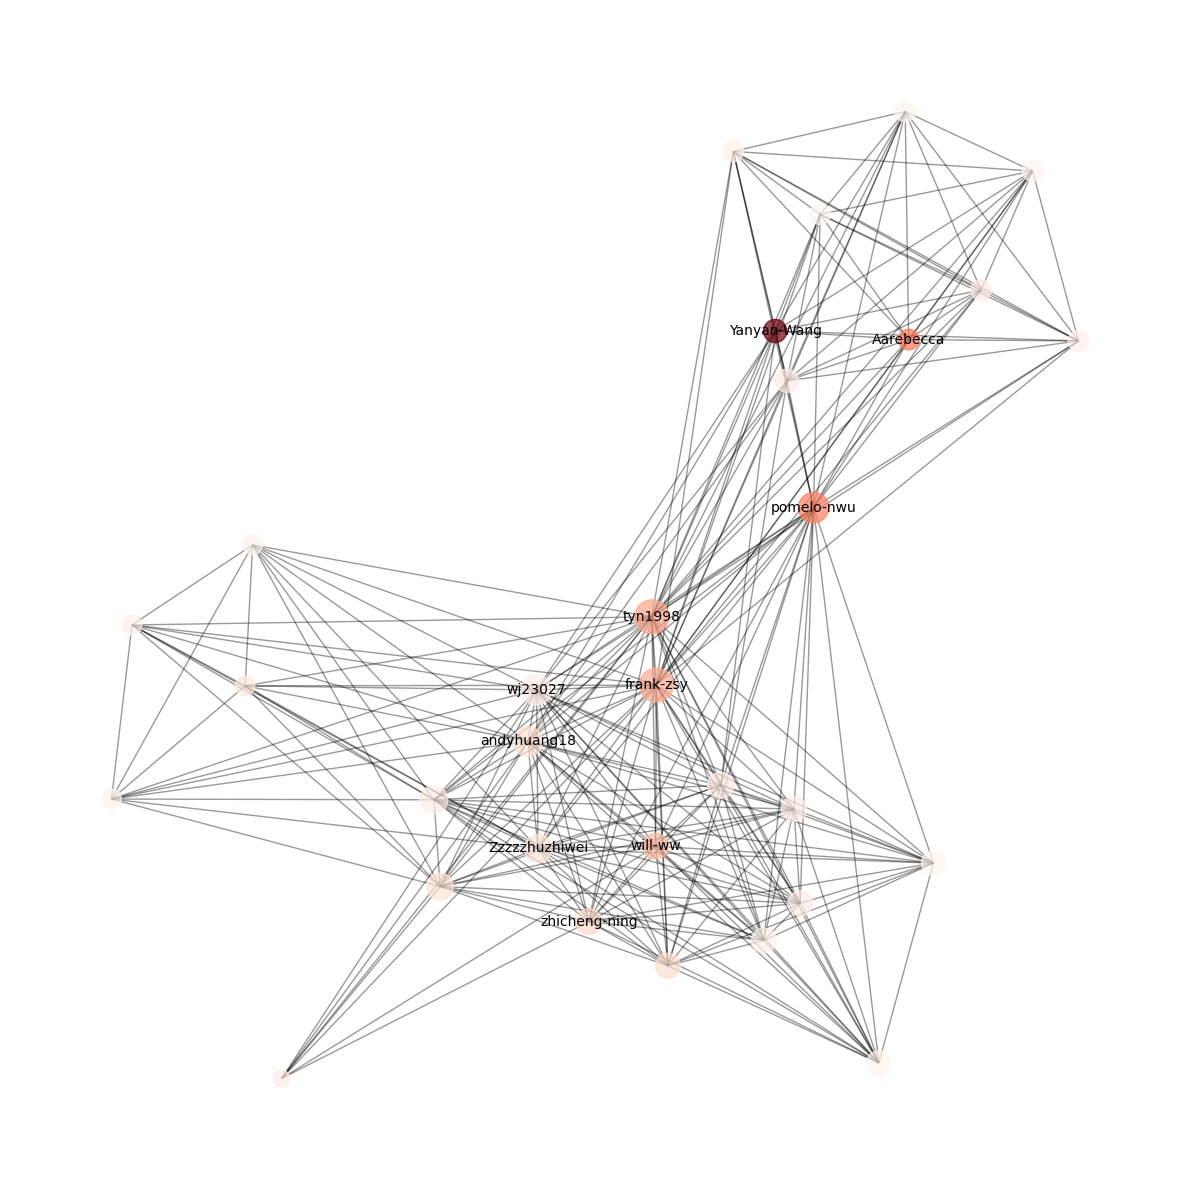

In [15]:
import json
# 读出文件中的数据
with open('hw4_data.json',mode='r',encoding='utf-8')as file:
    data=json.load(file)
# 初始化一个空字典，用来存放人与人之间的关系
social_network = {}
# 读取nodes键中存储的用户ID，并将其作为键初始化为空字典
# 这一步是为了构建一个表示社交网络的字典，其中每个用户对应一个字典，记录其朋友和关系权重
for node in data["nodes"]:
    user_id = node[0]
    social_network[user_id] = {}
# 读取edges键中存储的人际关系，并建立相应的连接
# 这里确保了社交网络是无向的，即如果user1和user2是朋友，那么在user1的朋友列表中会有user2，反之亦然
for edge in data["edges"]:
    user1,user2,weight = edge
    if user1 not in social_network[user2]:
        social_network[user2][user1] = weight
    if user2 not in social_network[user1]:
        social_network[user1][user2] = weight    

# 利用items()函数获得字典中所有键值对，将其全部打印出来
print("社交网络关系：")
for user,friends in social_network.items():
    print(f"{user}:{friends}")
# 利用keys()函数获得friends里所有的键，即所有朋友名字，转化为列表打印
print("\n每个用户的直接朋友")
for user,friends in social_network.items():
    print(f"{user}的直接朋友:{list(friends.keys())}")

# 初始化一个空字典，用来存放每个人的度数
degrees={}
# len(friends)表示了朋友的数量，键值对算作一个整体
for user,friends in social_network.items():
    degrees[user] = len(friends)

# 利用key函数来确定比较的原则是朋友的数量，将结果以倒序排列，取前5个放进列表
top5_degree_users = sorted(degrees.items(),key=lambda item:item[1],reverse=True)[:5]
print("\n度数最多的5个用户是：")
# 打印列表中的每个元素
for user,degree in top5_degree_users:
    print(f"{user}:{degree}")

# 初始化一个空字典，用来存放每个人的影响力
influence_list={}
# 回到初始数据中去找影响力数据
for node in data["nodes"]:
    user_id = node[0]
    influence = node[1]
    influence_list[user_id] = influence
# 与度数相同思想
top5_influence_users = sorted(influence_list.items(),key = lambda item:item[1],reverse=True)[:5]
print("\n影响力最大的5个用户是：")
for user,influence in top5_influence_users:
    print(f"{user}:{influence}")

# 初始化一个空字典
degree_and_influence={}
# 将前两个字典中user的数据加权
for user in social_network:
    degree_and_influence[user] = degrees[user]*0.5+ influence_list[user]*0.5
top1_influence_users = sorted(degree_and_influence.items(),key = lambda item:item[1],reverse=True)[:1]
print("\n综合影响力最大的用户是")
print(top1_influence_users)

# 找出 Yanyan-Wang 的直接朋友
yanyan_wang = "Yanyan-Wang"
# 得到人际关系中Yanyan-Wang的单独部分
yanyan_wang_friends = social_network.get(yanyan_wang, {})

# 找出 Yanyan-Wang 的“朋友的朋友”
yanyan_wang_friends_of_friends = {}
for friend in yanyan_wang_friends:
    for friend_of_friend in social_network[friend]:
        # 若这个朋友的朋友不是Yanyan-Wang本人
        if friend_of_friend != yanyan_wang:
            # 建立一个键表示这个人，之后每出现一次，则表示两人有一个共同的朋友，令其值+1
            yanyan_wang_friends_of_friends[friend_of_friend] = yanyan_wang_friends_of_friends.get(friend_of_friend, 0) + 1

# 根据共同朋友的数量对“朋友的朋友”进行排序
sorted_friends_of_friends = sorted(yanyan_wang_friends_of_friends.items(), key=lambda item: item[1], reverse=True)

# 推荐共同朋友最多的用户
if sorted_friends_of_friends:
    # 第一个0表示取第一个键值对，第二个0表示取键
    recommended_friend = sorted_friends_of_friends[0][0]
    reason = f"有最多共同的朋友 ({sorted_friends_of_friends[0][1]} 个共同朋友)"
    print(f"推荐新朋友：{recommended_friend},理由：{reason}")
    print("没有找到合适的新朋友推荐。")

# 找出与 Yanyan-Wang 连接强度最高的5个用户
yanyan_wang_strength = sorted(yanyan_wang_friends.items(), key=lambda item: item[1], reverse=True)
top5_strength_users = yanyan_wang_strength[:5] 

print("\n与 Yanyan-Wang 连接强度最高的5个用户:")
for user, strength in top5_strength_users:
    print(f"{user}: 连接强度 {strength}")


import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# 添加节点,大小由度数决定，颜色由影响力决定
for user in social_network:
    G.add_node(user, size=degrees[user], color=influence_list[user])

# 添加边,添加权重为边属性
for user, friends in social_network.items():
    for friend, weight in friends.items():
        G.add_edge(user, friend, weight=weight)

# 为节点设置大小和颜色
size_list = [G.nodes[data]['size'] * 20 for data in G.nodes()]  # 度数乘以一个因子以增大节点大小
color_list = [G.nodes[data]['color'] for data in G.nodes()]  # 影响力得分决定颜色

# 使用spring_layout布局算法，并增加scale参数来调整节点间的距离
pos = nx.spring_layout(G, k=0.15, iterations=20)

# 绘制网络图
plt.figure(figsize=(12, 12))  # 设置图形的大小
nx.draw_networkx_nodes(G, pos, node_size=size_list, node_color=color_list, cmap=plt.cm.Reds, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.4)  # 设置边的透明度

# 可以选择只显示综合影响力较高的节点标签，以避免标签重叠
# 例如，仅显示综合影响力前10的节点标签
top_nodes = sorted(degree_and_influence, key=degree_and_influence.get, reverse=True)[:10]
nx.draw_networkx_labels(G, pos, labels={node: node for node in top_nodes}, font_size=10)

# 显示图形
plt.axis('off')  # 关闭坐标轴
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()
